In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [20]:
# Load the dataset
file_path = r'C:\Users\bhard\OneDrive\Desktop\My all Projects\Customer Segmentation Analysis\segmentation data.csv'
df = pd.read_csv(file_path)

In [21]:
# Data Exploration and Cleaning
print("First few rows of the dataset:")
print(df.head())

print("\nColumn Names:")
print(df.columns)

print("\nDataset Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

First few rows of the dataset:
          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  

Column Names:
Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int6

In [23]:
# Handle missing values if necessary
# For simplicity, we'll drop rows with missing values in this example
df.dropna(inplace=True)

print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                 ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.25

In [24]:
# Select relevant columns for clustering
# For this example, we'll use 'Age' and 'Income' as features
feature_columns = ['Age', 'Income']  # Columns to use for clustering

In [25]:
# Check if the feature columns exist in the DataFrame
for col in feature_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' is not in the dataset.")

In [26]:
# Feature selection
features = df[feature_columns]

In [27]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

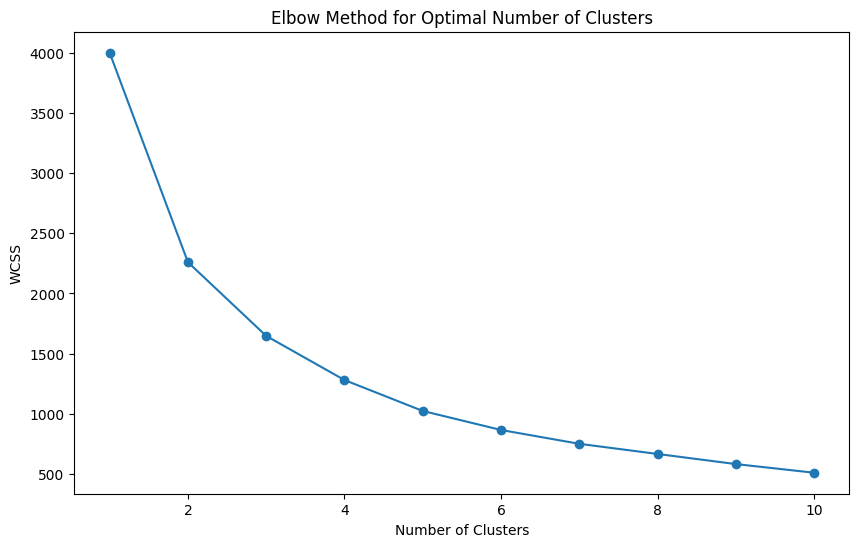

In [28]:
# Determine the number of clusters (e.g., using the Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
# Fit KMeans with the optimal number of clusters (e.g., 3 based on the Elbow Method result)
optimal_clusters = 3  # Update this based on the Elbow Method result
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(features_scaled)

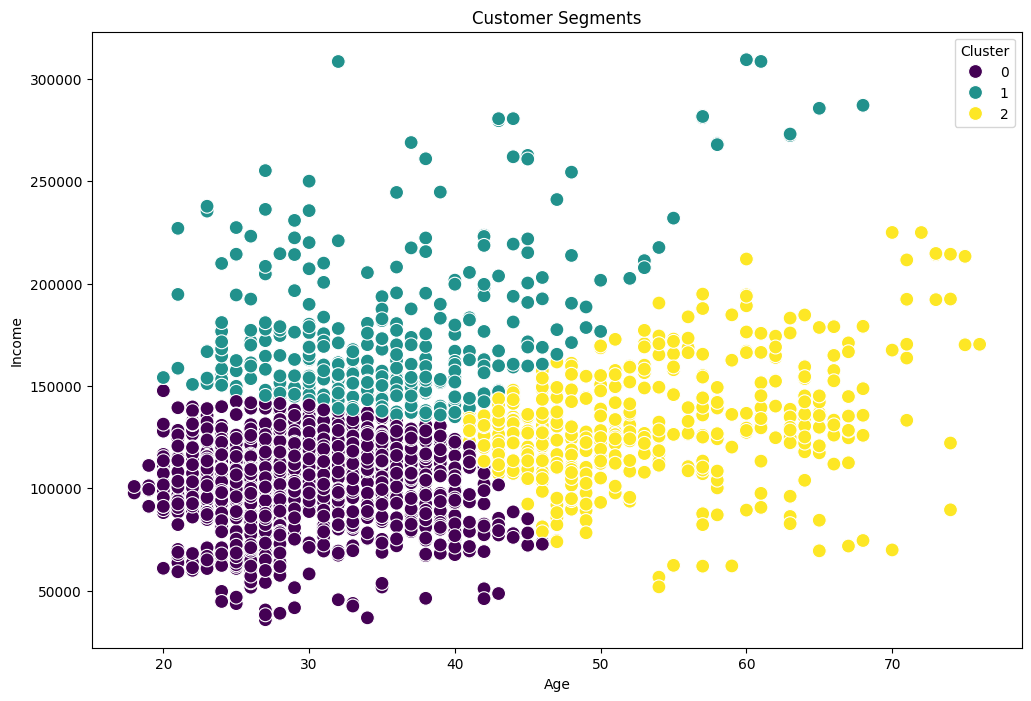

In [30]:
# Scatter plot of clusters (using 'Age' and 'Income')
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='Income', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.show()

In [31]:
# Analyze characteristics of each cluster
print("\nCluster Characteristics:")
print(df.groupby('Cluster').mean())


Cluster Characteristics:
                   ID       Sex  Marital status        Age  Education  \
Cluster                                                                 
0        1.000011e+08  0.548148        0.566255  29.701235   0.837037   
1        1.000007e+08  0.259259        0.398860  35.883191   0.997151   
2        1.000009e+08  0.361751        0.380184  53.308756   1.633641   

                Income  Occupation  Settlement size  
Cluster                                              
0        101652.264198    0.620576         0.532510  
1        175191.826211    1.475783         1.341880  
2        131126.741935    0.804147         0.829493  


In [32]:
# Example insights and recommendations
print("\nInsights and Recommendations:")
print("1. Identify key customer segments based on 'Age' and 'Income'.")
print("2. Develop targeted marketing strategies for each segment.")
print("3. Use cluster insights to tailor product offerings and improve customer satisfaction.")


Insights and Recommendations:
1. Identify key customer segments based on 'Age' and 'Income'.
2. Develop targeted marketing strategies for each segment.
3. Use cluster insights to tailor product offerings and improve customer satisfaction.
